<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 2.4

Section 2.4.1 discusses Maximum Likelihood Estimation (MLE) for random samples, where the likelihood function is based on probabilities and instances of input variables. A random sample would be pulling input values from a distribution, and the likelihood function would estimate the likelihood of observing an output given different inputs, quantifying how well a statistical model explains the input-output relationship. MLE is used for parameter estimation, finding the parameters that best show the relationship between inputs and outputs.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [5]:
# 2.4.1: MLE
# Example 1

np.random.seed(40) # random seed
data = np.random.normal(loc = 0, scale = 2, size = 100) # normal distribution random variable, centered at the mean

mean = np.mean(data)
std = np.std(data)

def log_likelihood(params, data): # log likelihood
    mu, sigma = params
    likelihood = np.sum(stats.norm.logpdf(data, loc = mu, scale = sigma))
    return -likelihood # maximize likelihood: smallest absolute value

initial_guess = [mean, std]
result = minimize(log_likelihood, initial_guess, args = (data,), method = 'Nelder-Mead') # parameter estimation using minimization
mu_mle, sigma_mle = result.x

print("Maximum Likelihood Estimate (MLE):")
print("Mean (mu):", mu_mle)
print("Standard Deviation (sigma):", sigma_mle)

Maximum Likelihood Estimate (MLE):
Mean (mu): -0.04557962873317175
Standard Deviation (sigma): 1.9452327740488715


Section 2.4.2 discusses Linear Regression, which weights input variables and produces an output using a linear function, where the input variables with the greatest weights are most numerically important. The interpretability comes when all variables are scaled, so that the weights tell you the interpretable importance, but linear regression is most successful when accounting for relationships between variables. Linear Regression can also produce a correlation coefficient using line-of-best-fit, which determines the relationship between two variables. It is also used heavily in machine learning,where machine learning algorithms are used to determine the weights of the input variables.

Correlation Coefficient (r): 0.974376661402209


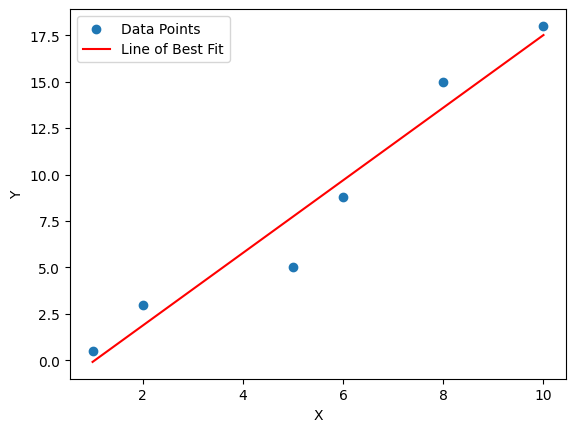

In [7]:
# 2.4.2: Linear Regression
# Example 1: Line of Best Fit and Correlation

X = [1, 2, 5, 6, 8, 10] # one-variable inputs
Y = [.5, 3, 5, 8.8, 15, 18]

mean_x = np.mean(X)
mean_y = np.mean(Y)

slope = np.sum((X - mean_x) * (Y - mean_y)) / np.sum((X - mean_x) ** 2)

plt.scatter(X, Y, label = 'Data Points')

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) # line of best fit, r_value is correlation coefficient

plt.plot(X, slope * np.array(X) + intercept, color = 'red', label = 'Line of Best Fit')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

print("Correlation Coefficient (r):", r_value)


In [12]:
# Example 2: Scikit-Learn

X = [[1, 2], [5, 6], [8, 10]] # two-variable inputs
Y = [0.5, 3, 5]

scaler = StandardScaler()
X = scaler.fit_transform(X) # scales inputs so weights are strictly by importance

model = LinearRegression() # model object
model.fit(X, Y) # fit model to find weights

print("Model Coefficients:", model.coef_) # weights
print("Intercept:", model.intercept_)



Model Coefficients: [1.43372088 0.40824829]
Intercept: 2.8333333333333335
